## Group 42 Project Proposal : The Classification of Wine Quality

### Introduction

White wine is one of the oldest and most cherished alcoholic beverages known to humanity. It is not merely a drink; it is a wonderful interaction between flavors and aromas, a product of nature's alchemy and human craftsmanship that is commonly enjoyed before a meal, with dessert, or as a refreshing drink between meals. White wine is known for its light and refreshing taste, which sets it apart from many of its red wine counterparts. Due to its acidity and aroma, white wine is also useful in cooking, helping to soften meat and enhance the flavors of various dishes. The essence of white wine lies in its quality, a multifaceted concept that encompasses various chemical components and sensory attributes. 

This study delves into the complexity of wine quality, using a systematic approach to assess white wines on a scale of 1 to 10.  Our research focuses on five fundamental chemical properties: pH, density, alcohol content, residual sugar content, and citric acid.  As each of these elements plays a crucial role in shaping the taste, aroma, and overall character of the wine, we would like to build a model to predict the score of wine quality by the five properties.

This project uses the Wine Quality dataset of the white variant of the Portuguese "Vinho Verde" wine. This dataset contains 4898 observations of white wine with 12 attributes for each observation, however, only 6 of the attributes will be used for this classification project. This particular dataset contains no missing values.


#### Research question: Can a wine’s quality be accurately predicted on a scale of 1 to 10 based on its pH, density, alcohol content, residual sugar content, and citric acid?

To begin thinking about how to approach this question, we must first take a look at the raw data set. We will first load in a few useful packages for loading and working with our data set.

In [1]:
#load library
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

### 1. Read Data
Before we begin working with the data, we must load it into R from the web. The url for this dataset is https://archive.ics.uci.edu/static/public/186/wine+quality.zip. Note that this is a zip file, and so we must unzip this file to access the .csv file within.

In [2]:
dir.create("data/")

Warning message in dir.create("data/"):
“'data' already exists”


In [3]:
url <- "https://archive.ics.uci.edu/static/public/186/wine+quality.zip" # Url for the dataset's zip file, containing white and red wine data.

download.file(url, destfile = "data/wine_quality.zip")
unzip("data/wine_quality.zip", exdir = "data/") # Unzipping the zipped wine quality file.
white_wine_data <- read_delim("data/winequality-white.csv", delim = ";")  # Selecting the white wine data that will be used for this project.
white_wine_data

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


### 2. Wrangling and Cleaning

In [5]:
colnames(white_wine_data) <- c("fixed_acidity", # Adjusting column names for cleanliness.
              "volatile_acidity",
              "citric_acid",
              "residual_sugar",
              "chlorides",
              "free_sulfur_dioxide",
              "total_sulfur_dioxide",
              "density",
              "pH",
              "sulphates",
              "alcohol",
              "quality")

white_wine_data <- white_wine_data |>      # Chaning the column "quality" into factor
    mutate(quality = as_factor(quality)) 

white_wine_data <- white_wine_data |>
            select(citric_acid, residual_sugar, density, pH, alcohol, quality) # Selecting the variables to be measured.
white_wine_data

citric_acid,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.36,20.7,1.0010,3.00,8.8,6
0.34,1.6,0.9940,3.30,9.5,6
0.40,6.9,0.9951,3.26,10.1,6
⋮,⋮,⋮,⋮,⋮,⋮
0.19,1.2,0.99254,2.99,9.4,6
0.30,1.1,0.98869,3.34,12.8,7
0.38,0.8,0.98941,3.26,11.8,6


The first 5 columns here are going to be the predictors for the quality column. A brief description of each is as follows:
- `citric_acid` -> The mass of citric acid in the wine (g/dm$^{3}$).
- `residual_sugar` -> The mass of residual sugar in the wine (g/dm$^{3}$).
- `density` -> The density of the wine (g/cm$^{3}$).
- `pH` -> The pH of the wine (1-14).
- `alcohol` -> The volume % alcohol content of the wine.

The last column, `quality`, is a rating on a scale from 1 to 10 of the wine's determined quality based on the given physicochemical factors.

In [6]:
set.seed(1357)
# Creating the training and testing split of the data
wine_split <- initial_split(white_wine_data, prop = .75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_train
wine_test

citric_acid,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.41,1.45,0.9908,2.99,12.0,5
0.37,1.20,0.9920,3.18,10.8,5
0.62,19.25,1.0002,2.98,9.7,5
⋮,⋮,⋮,⋮,⋮,⋮
0.42,2.5,0.99132,3.36,11.60,7
0.28,5.7,0.99168,3.21,12.15,7
0.22,1.9,0.98928,3.04,13.00,7


citric_acid,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.36,20.7,1.0010,3.00,8.8,6
0.40,6.9,0.9951,3.26,10.1,6
0.36,20.7,1.0010,3.00,8.8,6
⋮,⋮,⋮,⋮,⋮,⋮
0.17,1.9,0.98964,3.27,11.5,6
0.30,1.1,0.98869,3.34,12.8,7
0.38,0.8,0.98941,3.26,11.8,6


### 3. Summarizing the Data
To summarize our training data, we 
1. count the number of observations for each quality of wine
2. calculate the mean of each predictor
3. calculate the mean of each predictor for each quality.

In [9]:
# Count the number of observations
wine_qual_counts <- wine_train |>
            group_by(quality) |>
            summarize(count = n())
print(wine_qual_counts)

# A tibble: 7 × 2
  quality count
  <fct>   <int>
1 3          15
2 4         136
3 5        1088
4 6        1650
5 7         648
6 8         131
7 9           4


From the table we can see that only white wines of qualities 3 through 9 are present in the table, with the most of the data set being the wine quality of 6.

In [10]:
# Summarize the overall mean of each predictor
wine_avgs <- wine_train |>
            select(citric_acid:alcohol) |>
            map_df(mean) 
wine_avgs

citric_acid,residual_sugar,density,pH,alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3343301,6.34774,0.9940136,3.189834,10.51282


In [16]:
# Summarize the mean of predictors for each quality of wine
wine_each_avgs <- wine_train |>
            group_by(quality) |>
            summarize(across(citric_acid:alcohol, mean))
wine_each_avgs

quality,citric_acid,residual_sugar,density,pH,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.3526667,5.540000,0.9944833,3.200667,10.420000
4,0.3013971,4.616176,0.9942829,3.185147,10.142279
5,0.3383088,7.244715,0.9952288,3.168750,9.804105
⋮,⋮,⋮,⋮,⋮,⋮
7,0.3254784,5.127855,0.9924310,3.218704,11.37384
8,0.3276336,5.546565,0.9922208,3.220458,11.63664
9,0.3975000,4.100000,0.9918750,3.315000,12.05000


### 4. Visualizing the Data

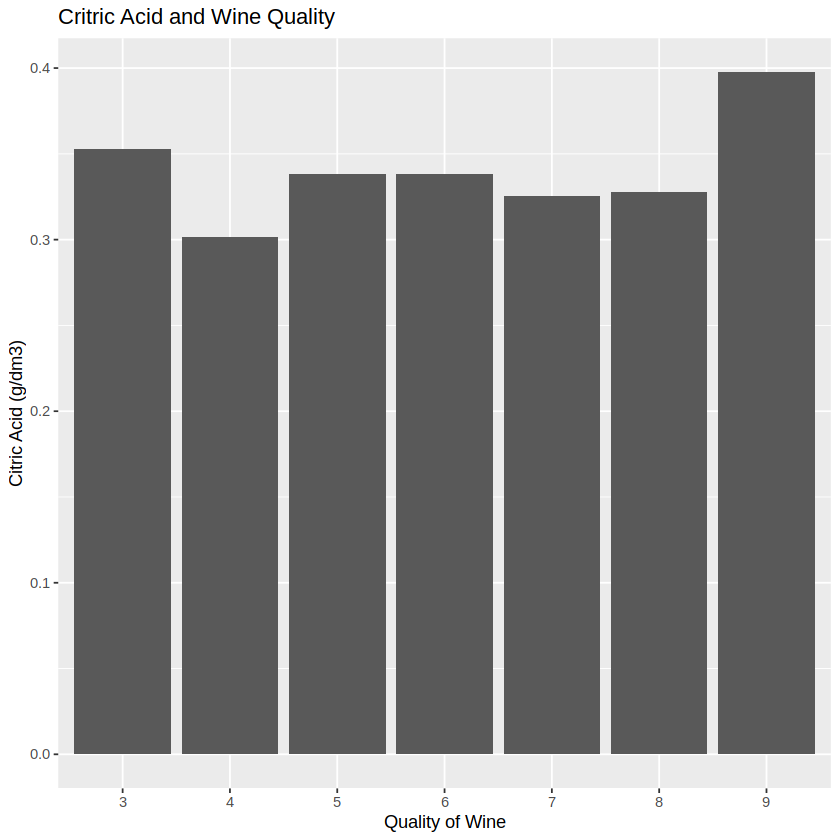

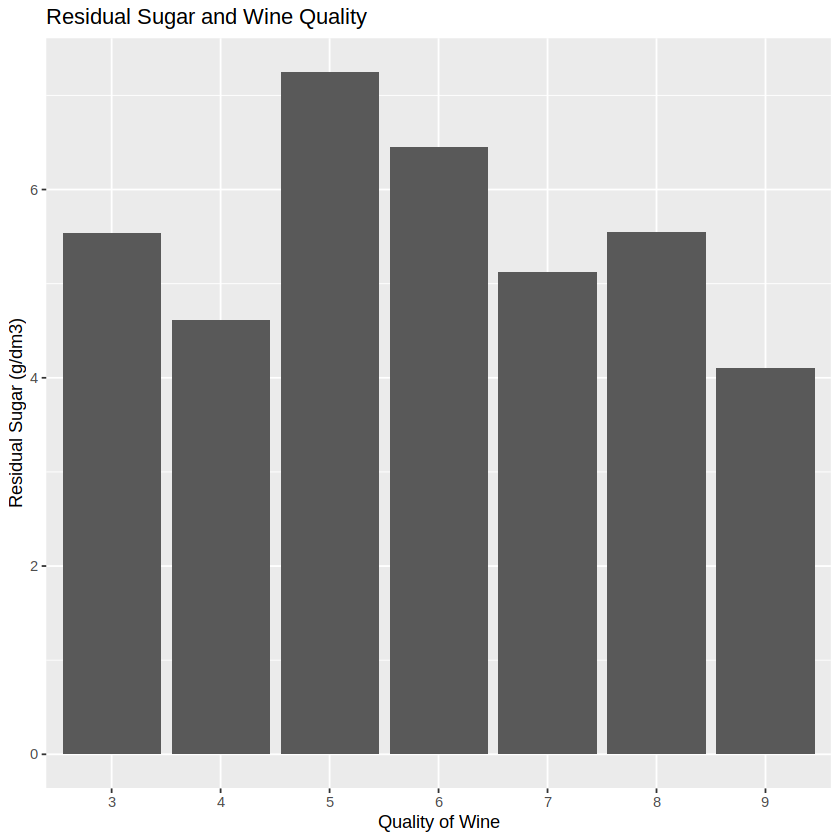

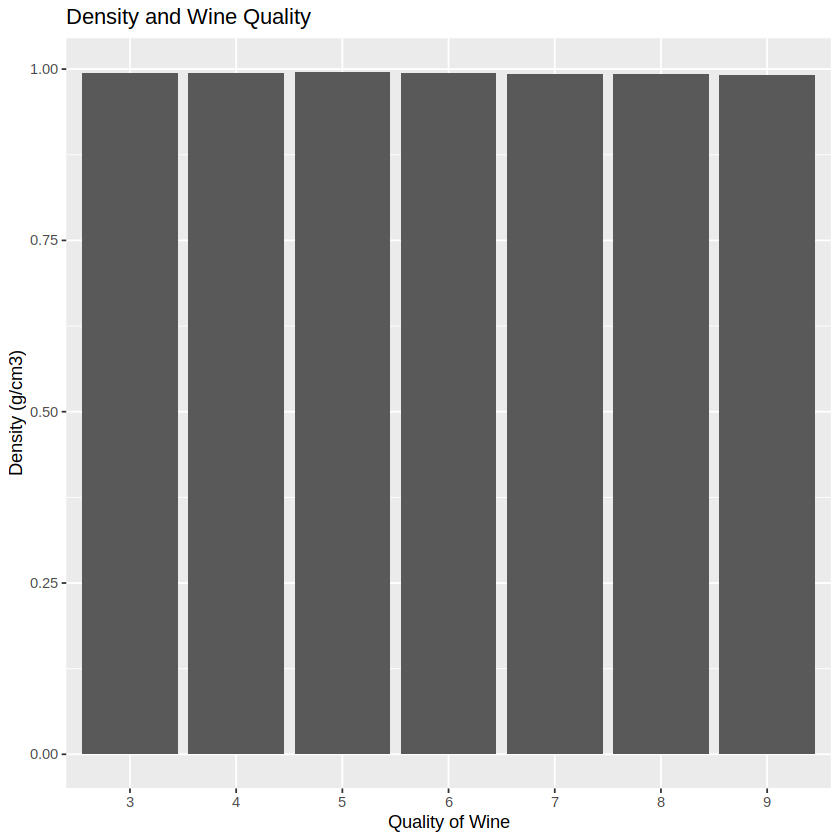

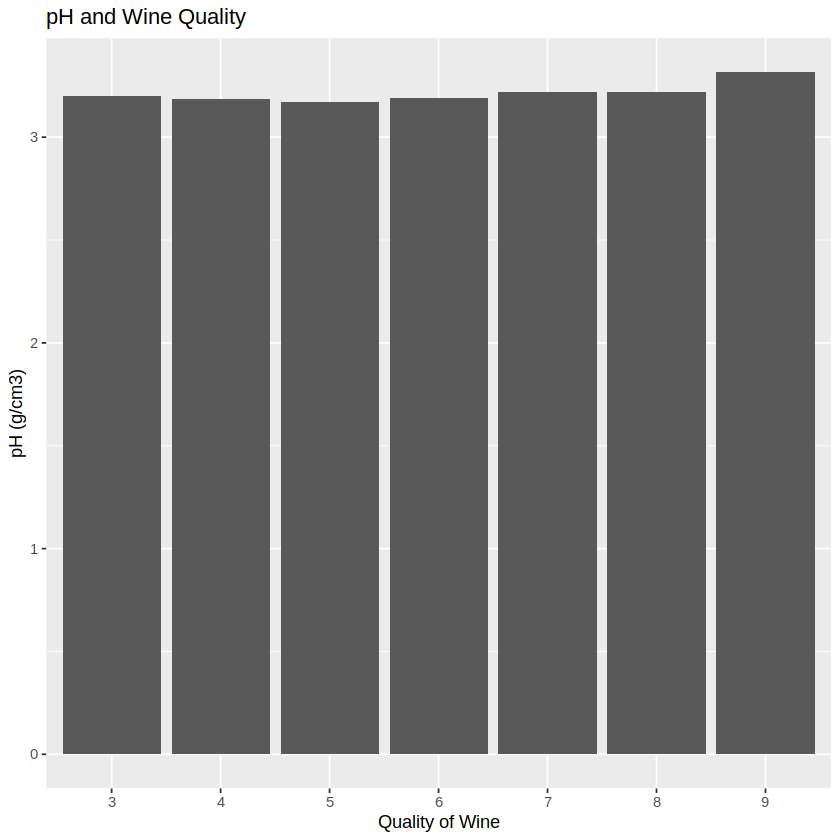

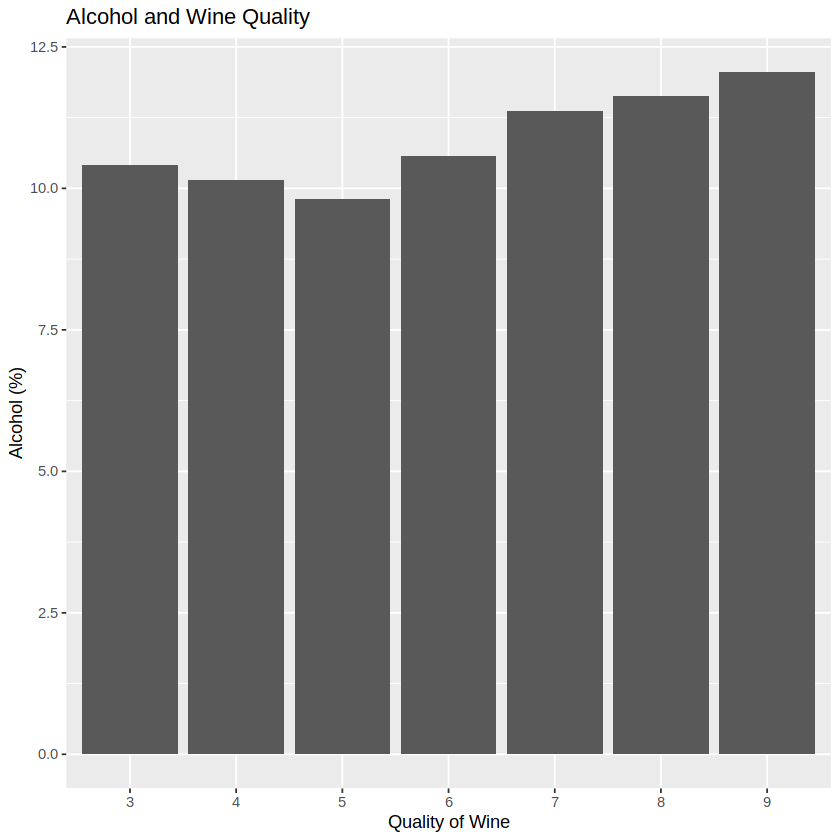

In [27]:
# Plot each predictor's average to see its relationship with the response variable
citric_acid_plot <- wine_each_avgs |>
    ggplot(aes (x = quality, y = citric_acid)) +
    geom_bar(stat = "identity") +
    ggtitle("Critric Acid and Wine Quality") +
    labs(x = "Quality of Wine", y = "Citric Acid (g/dm3)")

residual_sugar_plot <- wine_each_avgs |>
    ggplot(aes (x = quality, y = residual_sugar)) +
    geom_bar(stat = "identity") +
    ggtitle("Residual Sugar and Wine Quality") +
    labs(x = "Quality of Wine", y = "Residual Sugar (g/dm3)")

density_plot <- wine_each_avgs |>
    ggplot(aes (x = quality, y = density)) +
    geom_bar(stat = "identity") +
    ggtitle("Density and Wine Quality") +
    labs(x = "Quality of Wine", y = "Density (g/cm3)")

pH_plot <- wine_each_avgs |>
    ggplot(aes (x = quality, y = pH)) +
    geom_bar(stat = "identity") +
    ggtitle("pH and Wine Quality") +
    labs(x = "Quality of Wine", y = "pH (g/cm3)")

alcohol_plot <- wine_each_avgs |>
    ggplot(aes (x = quality, y = alcohol)) +
    geom_bar(stat = "identity") +
    ggtitle("Alcohol and Wine Quality") +
    labs(x = "Quality of Wine", y = "Alcohol (%)")

citric_acid_plot
residual_sugar_plot
density_plot
pH_plot
alcohol_plot

Methods: 
Response Variable: Quality
Variables/Predictors (columns): 
pH
Density
Alcohol
Residual Sugar
Citric Acid


Expected outcomes and significance:
What do we expect to find?
We expect to find the quality of wine by classifying it on a scale of 1 to 10 using 5 of its properties as predictors: pH, density, alcohol, residual sugar, and citric acid. In other words, when given a new observation of wine, we should be able to predict its wine quality using our classification method.

What impact could such findings have?
These findings can help wine sellers determine the quality of the wine they are selling, as well as their respective price ranges based on the quality. Clients will also be able to purchase high-quality wine, and understanding its quality can also help sellers understand the details and basis of why certain kinds of wine are sold most successfully.

What future questions could this lead to?